In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [4]:
# Data Preprocessing
# Load data set into pandas
df = pd.read_csv("Cleaned_dataset.csv")
df.head()

# Identify binary columns
binary_columns = [column for column in df.columns if df[column].nunique() == 2]
# Convert binary columns to 0 and 1
for col in binary_columns:
    unique_values = df[col].unique()
    if set(unique_values) == {"Yes", "No"}:
        df[col] = df[col].map({"Yes": 1, "No": 0})

catogorical_columns = ['Sex', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'HadDiabetes',
                       'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
                       'HighRiskLastYear', 'CovidPos']

# Extract the categorical columns into a new DataFrame
Catogorical_col = df[catogorical_columns]

# Use pd.get_dummies to transform the categorical columns
Transform_df = pd.get_dummies(Catogorical_col, dtype=int)

# Select numeric columns
numeric_columns = df.select_dtypes(include=["float64"]).columns
df_numeric = df[numeric_columns]

# Create standard scaler instance, fitting it, and scaling it
scaler = StandardScaler()
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Drop the original columns
df = df.drop(columns=catogorical_columns + numeric_columns.tolist())

# Combine the original DataFrame and the dummy variables DataFrame
merged_df = pd.concat([df, Transform_df, scaled_numeric_df], axis=1)
merged_df = merged_df.drop(columns='State')


In [5]:
# Split the data into 90% training and 10% and save the 10% for future testing
X = merged_df.drop(columns="HadHeartAttack")
y = merged_df["HadHeartAttack"]
X_train, X_future_test, y_train, y_future_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Save the 20% future test data into a CSV file
future_test_data = pd.concat([X_future_test, y_future_test], axis=1)
future_test_data.to_csv("future_test_data.csv", index=False)

Data_available = pd.concat([X_train, y_train], axis=1)
Data_available.to_csv("train_data.csv", index=False)


In [6]:
df = pd.read_csv ("train_data.csv")

# Split the data into 90% training and 10% and save the 10% for future testing
X = df.drop(columns="HadHeartAttack")
y = df["HadHeartAttack"]

# Split the remaining 90% into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Display the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Step 6: Create and fit the Logistic Regression model
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the model on the 16% test set
y_pred_test = classifier.predict(X_test)
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))


(213372, 73) (53344, 73) (213372,) (53344,)
Test Set Evaluation:
Accuracy: 0.9503974205158968
Confusion Matrix:
 [[50013   540]
 [ 2106   685]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     50553
           1       0.56      0.25      0.34      2791

    accuracy                           0.95     53344
   macro avg       0.76      0.62      0.66     53344
weighted avg       0.94      0.95      0.94     53344



Future Test Set Evaluation:
Accuracy: 0.950566878121204
Confusion Matrix:
 [[27780   305]
 [ 1160   391]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     28085
           1       0.56      0.25      0.35      1551

    accuracy                           0.95     29636
   macro avg       0.76      0.62      0.66     29636
weighted avg       0.94      0.95      0.94     29636



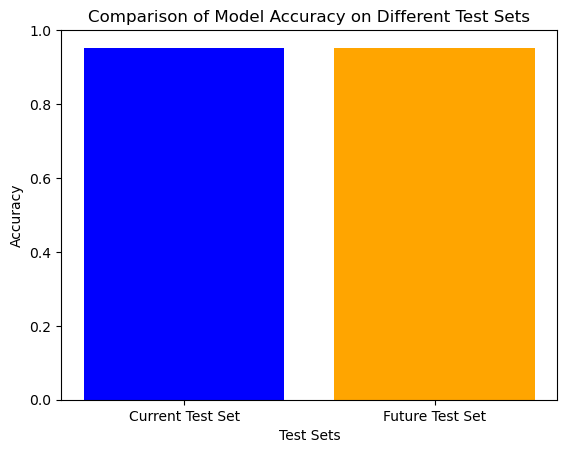

In [7]:
# Load the 20% future test data from the CSV file
future_test_data = pd.read_csv("future_test_data.csv")

X_future_test = future_test_data.drop(columns="HadHeartAttack")
y_future_test = future_test_data["HadHeartAttack"]

# Evaluate the model on the 20% future test set
y_pred_future_test = classifier.predict(X_future_test)
print("Future Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_future_test, y_pred_future_test))
print("Confusion Matrix:\n", confusion_matrix(y_future_test, y_pred_future_test))
print("Classification Report:\n", classification_report(y_future_test, y_pred_future_test))

# Plot the comparison of accuracy
labels = ['Current Test Set', 'Future Test Set']
accuracies = [accuracy_score(y_test, y_pred_test), accuracy_score(y_future_test, y_pred_future_test)]

plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.xlabel('Test Sets')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy on Different Test Sets')
plt.ylim(0, 1)
plt.show()
